In [1]:
%load_ext autoreload
%autoreload 2

# Analyzing HSPCs with the TemporalProblem

In this tutorial, we show how to use the TemporalProblem to analyze the trajectory of HSPC cells.



## Description of the dataset

The dataset is an extraction of the *Open Problems - Multimodal Single-Cell Integration* NeurIPS competition 2022. 

Cell type annotation was done based on *only* gene expression. Moreover, the annotation is very coarse, resulting in 

- MasP = Mast Cell Progenitor
- MkP = Megakaryocyte Progenitor
- NeuP = Neutrophil Progenitor
- MoP = Monocyte Progenitor
- EryP = Erythrocyte Progenitor
- HSC = Hematoploetic Stem Cell
- BP = B-Cell Progenitor

ATAC-seq peakk counts were transformed with `TF-IDF` (`log(TF) * log(IDF)`)

## Importing packages and loading the data

In [2]:
import scanpy as sc

from moscot.problems.time import TemporalProblem
from moscot.datasets import hspc
import moscot.plotting as mpl

/Users/dominik.klein/opt/anaconda3/envs/moscot_env3/lib/python3.9/site-packages/docrep/decorators.py:43: SyntaxWarning: 'device' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [3]:
adata = hspc()

In [25]:
np.unique(adata.obsm["peaks"][0,:].A)

array([0.       , 4.812877 , 5.5019536, 5.9060583, 6.1930594, 6.415794 ,
       6.597843 , 6.751799 , 6.8851843, 7.0028534, 7.1081233, 7.203359 ,
       7.2903085, 7.3702984, 7.4443617, 7.5133157, 7.57782  , 7.6384144,
       7.695546 , 7.7495894, 7.800861 , 7.849632 , 7.896134 , 7.9405694,
       7.9831142, 8.023923 , 8.063131 , 8.10086  , 8.137217 , 8.1722975,
       8.20619  , 8.301476 , 8.331321 , 8.360301 , 8.415858 , 8.468491 ,
       8.716907 , 8.865304 , 8.931986 , 8.947984 , 8.979233 , 9.348102 ,
       9.3897705, 9.625067 ], dtype=float32)

In [26]:
adata.var

,n_cells,highly_variable,means,dispersions,dispersions_norm
2,95,True,2.086460,5.351474,1.276712
10,71,True,1.828224,5.533378,1.696343
13,1240,True,5.018017,5.601261,1.341482
33,39,True,1.351918,5.420325,1.199687
38,3,True,0.212995,5.297368,1.622722
...,...,...,...,...,...
23243,440,True,3.621748,5.343009,1.263745
23296,10,True,0.588111,5.306591,1.222974
23316,22,True,1.387984,6.271739,3.788420
23377,295,True,3.195369,5.408519,1.507931


/Users/dominik.klein/opt/anaconda3/envs/moscot_env3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


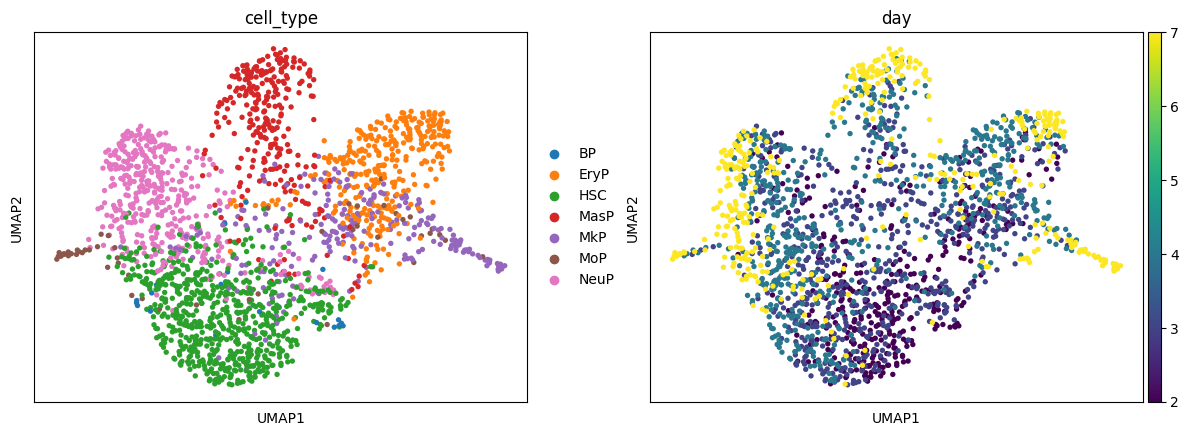

In [6]:
sc.pl.umap(adata, color=["cell_type", "day"])

In [7]:
tp = TemporalProblem(adata)
#tp = tp.score_genes_for_marginals(gene_set_proliferation="human", gene_set_apoptosis="human")
tp = tp.prepare("day")

INFO     Computing pca with `n_comps = 30` on `adata.X`.                                                           
INFO     Computing pca with `n_comps = 30` on `adata.X`.                                                           
INFO     Computing pca with `n_comps = 30` on `adata.X`.                                                           


In [8]:
tp = tp.solve(tau_a=0.99, tau_b=1)

In [14]:
import numpy as np
adata.obs["cell_costs_source"] = np.abs(tp.cell_costs_source)
adata.obs["cell_costs_target"] = np.abs(tp.cell_costs_target)

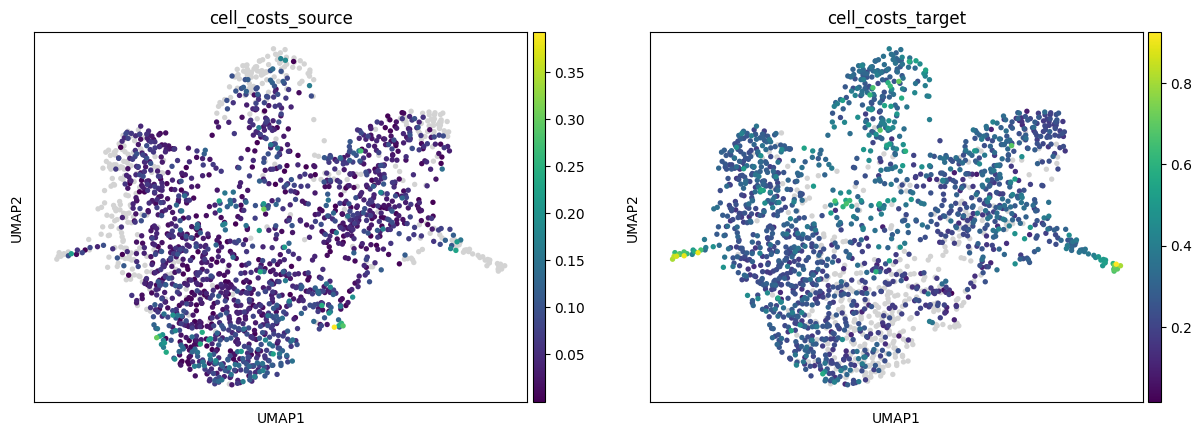

In [15]:
sc.pl.umap(adata, color= ["cell_costs_source", "cell_costs_target"])

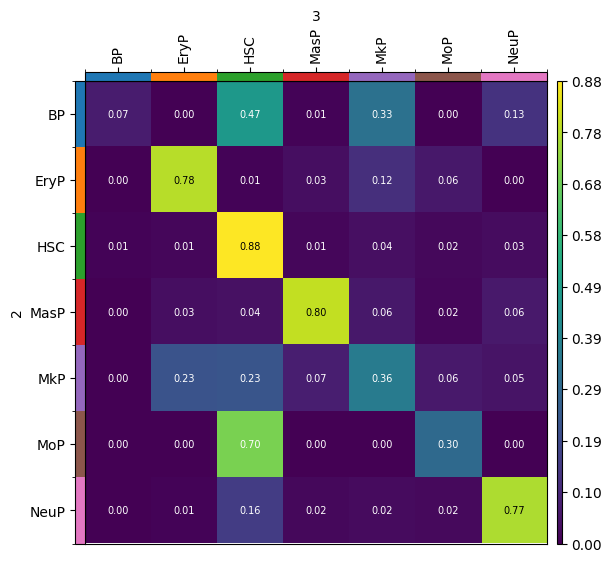

In [16]:
ct_desc = tp.cell_transition(2,3, "cell_type", "cell_type", forward=True)
mpl.cell_transition(tp)

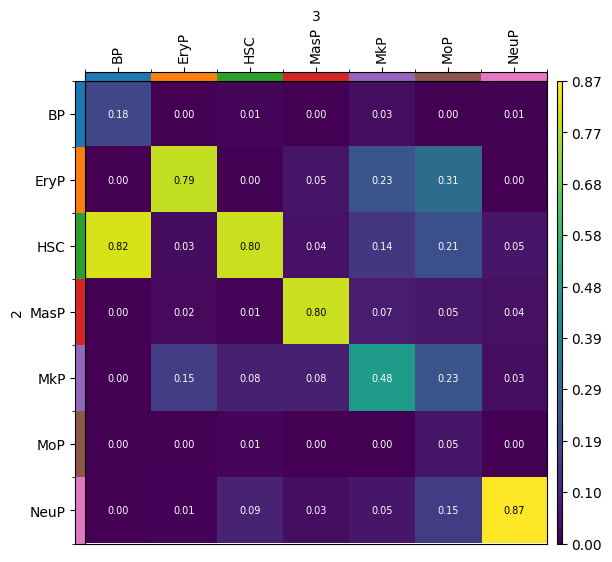

In [17]:
ct_anc = tp.cell_transition(2,3, "cell_type", "cell_type", forward=False)
mpl.cell_transition(tp)

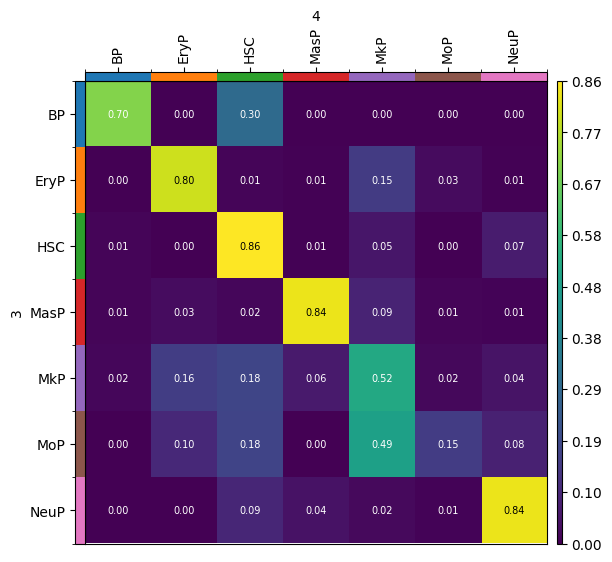

In [18]:
ct_desc = tp.cell_transition(3,4, "cell_type", "cell_type", forward=True)
mpl.cell_transition(tp)

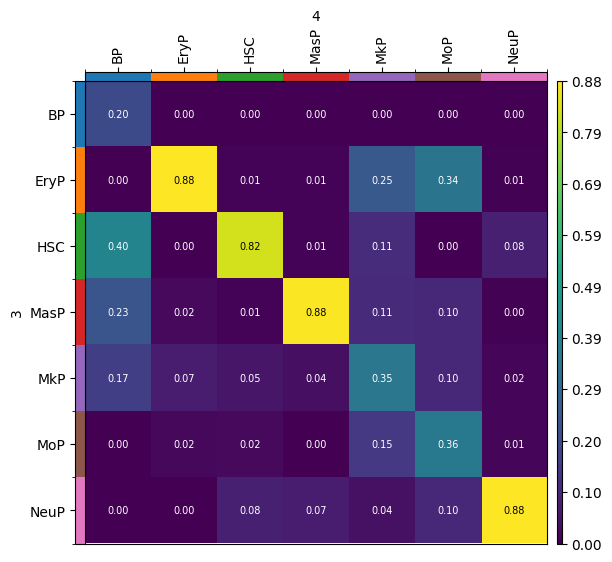

In [19]:
ct_anc = tp.cell_transition(3,4, "cell_type", "cell_type", forward=False)
mpl.cell_transition(tp)

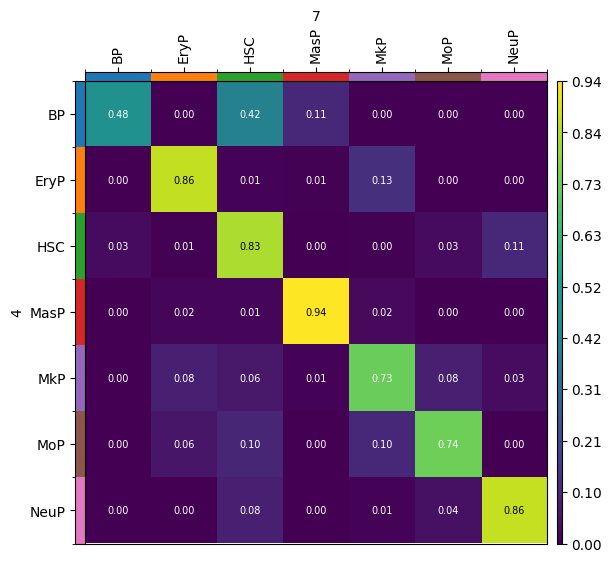

In [20]:
ct_anc = tp.cell_transition(4,7, "cell_type", "cell_type", forward=True)
mpl.cell_transition(tp)

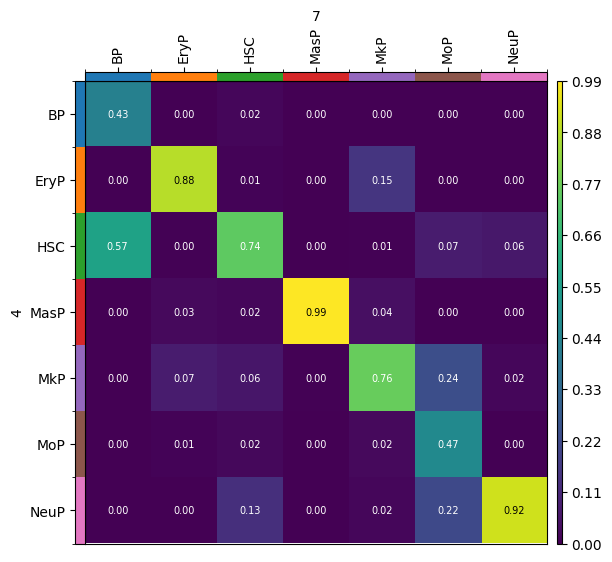

In [21]:
ct_anc = tp.cell_transition(4,7, "cell_type", "cell_type", forward=False)
mpl.cell_transition(tp)

In [12]:
adata.uns["moscot_results"]["cell_transition"]

{'cell_transition': {'transition_matrix':                         BP           HSC          MasP          NeuP  \
  cell_id                                                                
  9d9116b806de  0.000000e+00  1.000000e+00  0.000000e+00  8.744394e-21   
  18f1b5233585  0.000000e+00  1.944819e-10  2.915896e-29  0.000000e+00   
  baee66c58929  0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00   
  3a4a94c6e237  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
  b153c6f7488c  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
  ...                    ...           ...           ...           ...   
  5209bfcf1371  0.000000e+00  2.127785e-01  0.000000e+00  7.872215e-01   
  af51e9f4af98  1.034887e-35  1.000000e+00  0.000000e+00  0.000000e+00   
  4e5b45ea4549  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
  5b35df012366  0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00   
  321744b37b5c  0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  

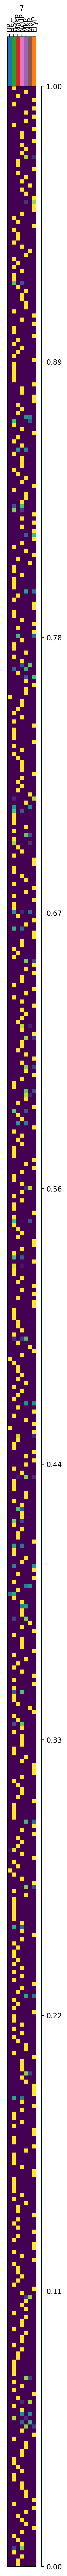

In [34]:
mpl.cell_transition(tp, dpi=200, annotate=None, figsize=(50,50))

In [27]:
ct_anc = tp.cell_transition(2,7, "cell_type", "cell_type", forward=True)


KeyError: (2, 7)